In [113]:
!pip install pandas matplotlib

import ast
import pandas as pd
import matplotlib.pyplot as plt

from functools import partial

In [114]:
dtype_spec = {
    'sent': int,
    'words': int,
    'tok_b': int,
    'tok_d': int,
    'tok_x': int,
    'tok_s': int,
    'chrs': int
}

df = pd.read_csv('../../data/mulabel/raw/stats-short.csv', parse_dates=['published'], dtype=dtype_spec)
df['labels'] = df['labels'].apply(ast.literal_eval)

print(f'Number of samples: {df.shape[0]}')
print(f'And columns: {df.columns}')

Number of samples: 1066277
And columns: Index(['suuid', 'published', 'country', 'language', 'type', 'sent', 'words',
       'tok_b', 'tok_d', 'tok_x', 'tok_s', 'chrs', 'path', 'labels'],
      dtype='object')


Compute text length distributions

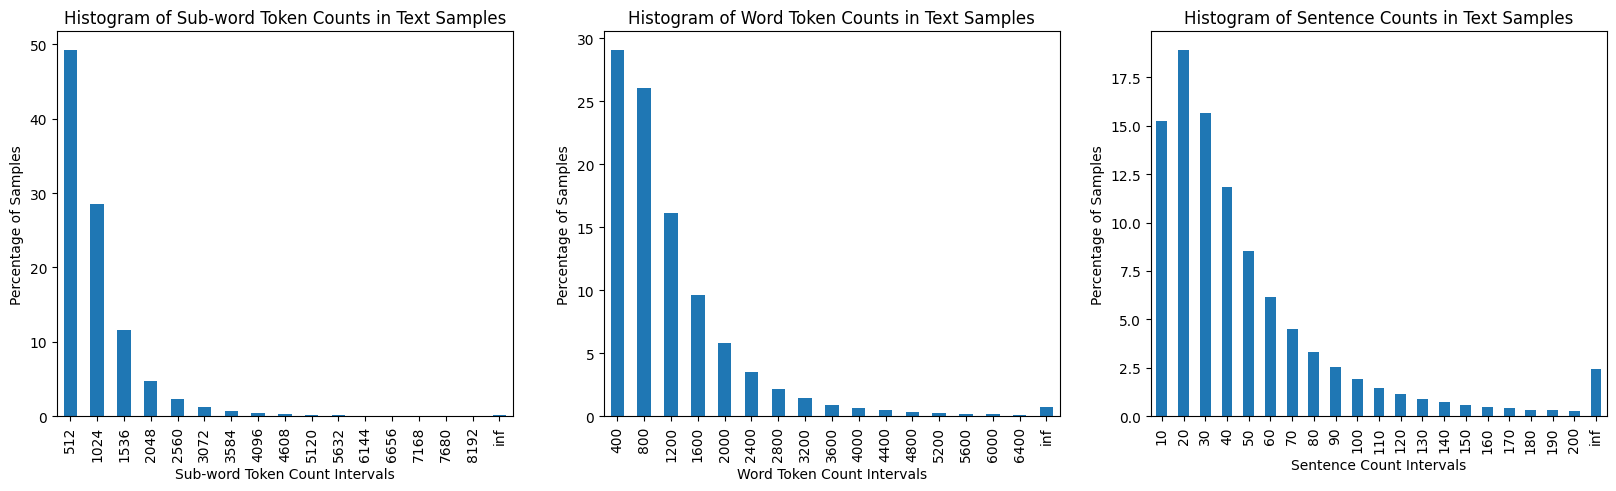

In [115]:
char_bins = [i for i in range(0, 8193, 512)]
char_bins.append(float('inf'))
char_histogram_counts = pd.cut(df['tok_x'], bins=char_bins).value_counts().sort_index()
char_histogram_percentages = (char_histogram_counts / df.shape[0]) * 100

word_bins = [i for i in range(0, 6401, 400)]
word_bins.append(float('inf'))
word_histogram_counts = pd.cut(df['words'], bins=word_bins).value_counts().sort_index()
word_histogram_percentages = (word_histogram_counts / df.shape[0]) * 100

sent_bins = [i for i in range(0, 201, 10)]
sent_bins.append(float('inf'))
sent_histogram_counts = pd.cut(df['sent'], bins=sent_bins).value_counts().sort_index()
sent_histogram_percentages = (sent_histogram_counts / df.shape[0]) * 100

fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 2 columns
char_histogram_percentages.plot(
    ax=axs[0], kind='bar',
    title='Histogram of Sub-word Token Counts in Text Samples', 
    xlabel='Sub-word Token Count Intervals',
    ylabel='Percentage of Samples'
)
axs[0].set_xticklabels(char_bins[1:])
word_histogram_percentages.plot(
    ax=axs[1], kind='bar', 
    title='Histogram of Word Token Counts in Text Samples', 
    xlabel='Word Token Count Intervals',
    ylabel='Percentage of Samples'
)
axs[1].set_xticklabels(word_bins[1:])
sent_histogram_percentages.plot(
    ax=axs[2], kind='bar', 
    title='Histogram of Sentence Counts in Text Samples', 
    xlabel='Sentence Count Intervals',
    ylabel='Percentage of Samples'
)
axs[2].set_xticklabels(sent_bins[1:])
plt.show()

Compute distribution by language

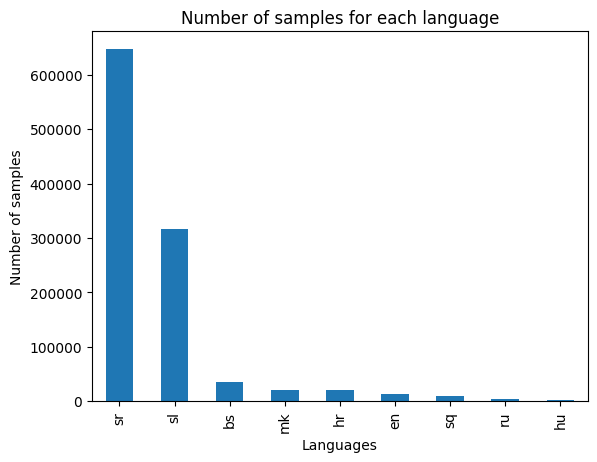

In [116]:
import matplotlib.pyplot as plt

language_counts = df['language'].value_counts()
filtered_language_counts = language_counts[language_counts > 100]
filtered_language_counts.plot(kind='bar')
plt.xlabel('Languages')
plt.ylabel('Number of samples')
plt.title('Number of samples for each language')
plt.show()

Distributions over the type of source (Media Type)

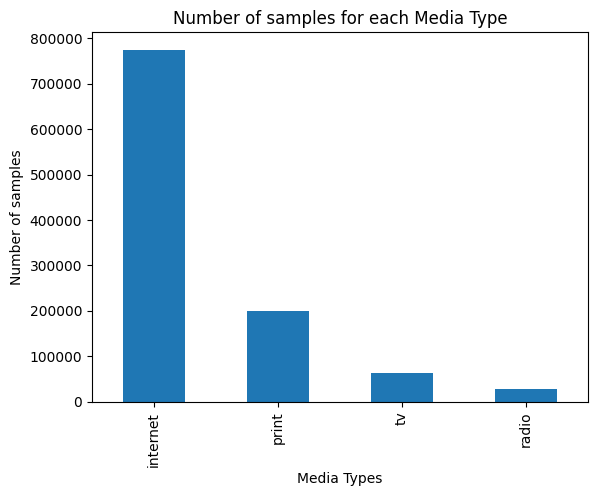

In [117]:
industries = df['type'].explode()
industries.value_counts().plot(kind='bar')
plt.xlabel('Media Types')
plt.ylabel('Number of samples')
plt.title('Number of samples for each Media Type')
plt.show()

Compute average characters, words and sentences per sub-word token for each language. (XLM-R and Deberta tokenizers)

In [118]:
df['char_xlmr_ratio'] = df['chrs'] / df['tok_x']
df['word_xlmr_ratio'] = df['words'] / df['tok_x']
df['sent_xlmr_ratio'] = df['sent'] / df['tok_x']
df['char_deb_ratio'] = df['chrs'] / df['tok_d']
df['word_deb_ratio'] = df['words'] / df['tok_d']
df['sent_deb_ratio'] = df['sent'] / df['tok_d']

language_statistics = df.groupby('language').agg(
    avg_chrs_xlmr=pd.NamedAgg(column='char_xlmr_ratio', aggfunc='mean'),
    avg_words_xlmr=pd.NamedAgg(column='word_xlmr_ratio', aggfunc='mean'),
    avg_sents_xlmr=pd.NamedAgg(column='sent_xlmr_ratio', aggfunc='mean'),
    avg_chrs_deb=pd.NamedAgg(column='char_deb_ratio', aggfunc='mean'),
    avg_words_deb=pd.NamedAgg(column='word_deb_ratio', aggfunc='mean'),
    avg_sents_deb=pd.NamedAgg(column='sent_deb_ratio', aggfunc='mean'),
    count=pd.NamedAgg(column='chrs', aggfunc='count')
)

filtered_language_statistics = language_statistics[language_statistics['count'] > 1000].sort_values(by=['count'], ascending=[False])
display(filtered_language_statistics)

,avg_chrs_xlmr,avg_words_xlmr,avg_sents_xlmr,avg_chrs_deb,avg_words_deb,avg_sents_deb,count
language,,,,,,,
sr,inf,1.211568,0.059455,inf,0.969981,0.048004,647172
sl,3.789442,1.226785,0.064090,3.276150,1.058164,0.055793,316664
bs,3.854441,1.279775,0.059839,2.982359,0.990133,0.046631,34445
mk,4.104552,1.327911,0.049124,3.297138,1.066448,0.039552,20394
hr,3.888868,1.281822,0.059741,2.978747,0.982462,0.046135,20053
en,3.629056,0.891305,0.099493,3.326369,0.790529,0.091901,12830
sq,3.774288,1.352062,0.053462,3.044196,1.090936,0.043499,9586
ru,3.828860,1.292337,0.067295,3.017936,1.019432,0.053298,3077
hu,3.666184,1.169197,0.057118,3.261557,1.050556,0.051838,1675
